In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the .parquet file
df = pd.read_parquet("splunk_agg_data_24-05-05__24-07-23.parquet")

# Exclude the 'time' column and get value counts for each of the other columns
value_counts = {col: df[col].value_counts() for col in df.columns if col != "time"}

# Print the first 5 rows of the dataframe
df.head(20)

,time,duration,status,post,get,delete,put,request_amount,url,error_count,anomalous
0,2024-05-05 11:00:00,9.900000e+04,200,3,0,0,0,3,/api/internal/paymentportalinternal/retrynotif...,0.0,0
1,2024-05-05 11:00:01,2.340000e+05,200,2,0,0,0,2,/api/v3/commerce/payments/creditcard/register-...,0.0,0
2,2024-05-05 11:00:02,4.070000e+05,200,1,2,0,0,3,/api/v3/commerce/payments/cardinal/lookup-/cre...,0.0,0
3,2024-05-05 11:00:03,3.100000e+04,200,0,1,0,0,1,/creditcard/retrieve/8babe8fd-bb3e-438e-a036-3...,0.0,0
4,2024-05-05 11:00:04,1.870000e+05,200,1,0,0,0,1,/creditcard/register,0.0,0
5,2024-05-05 11:00:05,4.226667e+05,200,1,2,0,0,3,/creditcard/retrieve/67776c11-ed5c-4457-adbd-3...,0.0,0
6,2024-05-05 11:00:06,1.185000e+05,200,1,1,0,0,2,/creditcard/register-/creditcard/retrieve/d4f7...,0.0,0
7,2024-05-05 11:00:07,1.043000e+06,200,1,0,0,0,1,/creditcard/3dsecure/lookup,0.0,0
8,2024-05-05 11:00:08,1.010000e+05,200,0,2,0,0,2,/creditcard/retrieve/edb36154-63ca-418d-8440-7...,0.0,0
9,2024-05-05 11:00:09,1.233333e+05,200,0,3,0,0,3,/api/v3/commerce/payments/creditcard/retrieve/...,0.0,0


In [2]:
df["url"].values[0]

'/api/internal/paymentportalinternal/retrynotify-/api/internal/variablefinancinginternal/migratedfstransaction-/api/v3/commerce/payments/creditcard/creategpkey'

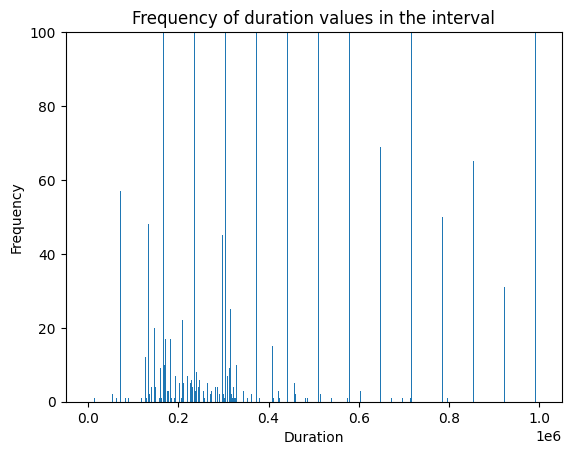

In [3]:
filtered_df = df[df["duration"].between(0, 1000000)]
value_counts_duration = filtered_df["duration"].value_counts().sort_index()

# Plot the frequency of each duration value in the interval
plt.bar(value_counts_duration.index, value_counts_duration)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Frequency of duration values in the interval")

# Define the y-axis limits
plt.ylim(0, 100)
plt.show()

In [4]:
df.query("error_count > 0").value_counts("duration")

duration
38500.000000     3
36000.000000     3
406750.000000    2
55000.000000     2
70888.888889     2
                ..
74032.258065     1
74090.909091     1
74106.382979     1
74121.428571     1
73833.333333     1
Name: count, Length: 2738, dtype: int64

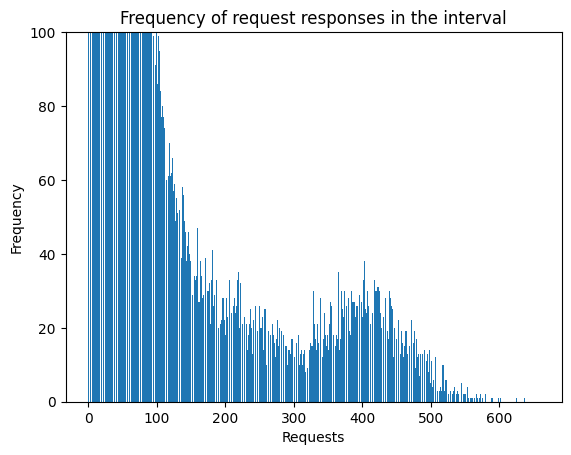

In [8]:
filtered_df = df[df["request_amount"].between(0, 1000)]
value_counts_request = filtered_df["request_amount"].value_counts().sort_index()

# Plot the frequency of each duration value in the interval
plt.bar(value_counts_request.index, value_counts_request)
plt.xlabel("Requests")
plt.ylabel("Frequency")
plt.title("Frequency of request responses in the interval")

# Define the y-axis limits
plt.ylim(0, 100)
plt.show()

In [10]:
df[["status", "error_count"]].value_counts().sort_index()

status  error_count
200     0.0            6685788
        1.0               1166
        2.0                156
        3.0                 20
        4.0                  3
        5.0                  2
        6.0                  2
        7.0                  1
202     0.0                 10
400     0.0               3958
        1.0                  6
        2.0                  5
        3.0                  1
403     0.0                287
404     0.0              13739
        1.0               1260
        2.0                109
        3.0                  6
405     0.0                  1
500     1.0                 13
        2.0                  6
        3.0                  1
        5.0                  2
        8.0                  1
        10.0                 1
        20.0                 1
        22.0                 1
Name: count, dtype: int64